#### PRELIMINARY OPERATIONS
- This is step we import all the necessary libraries

In [1]:
import tensorflow as tf
%matplotlib inline
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt 
import os
from IPython.display import display, clear_output

#### Installing COSMOPOWER
- CosmoPower can be conveniently pip-installed from PyPI.

In [2]:
!pip install cosmopower

- Getting dataset

In [3]:
from cosmosis.runtime.pipeline import LikelihoodPipeline
from cosmosis.runtime.config import Inifile
import numpy as np
import pandas as pd

#### Running cosebis cosmois Pipeline to Generate E_modes
- These Emodes are what we going to emulate using cosmopower

In [4]:
# N:B The start vector for params_fiducial was all set at the middle point 

#################################################
# Read in the cosmosis configuration file pipeline.ini 
inifile = 'pipeline11.ini'
ini = Inifile(inifile) 
#################################################

##################################################
# (optional) You can change things or read from ini: 

# set the value of MY_PATH in the [DEFAULT] section to /Users/username/Documents/repos/
# ini.set("DEFAULT","MY_PATH","/Users/username/Documents/repos/")

# get the value of modules in the [pipeline] section
# ini.get("pipeline","modules")

# ini.set("pipeline","modules","sample_S8 sigma8toAs camb")
####################################################

####################################################
# setup the pipeline and give it the ini values
pipeline = LikelihoodPipeline(ini)
# Get the fiducial values
params_fiducial = pipeline.start_vector()
# run the pipeline for the given parameters. All results are saved in block
block    = pipeline.run_parameters(params_fiducial)
stats_name_cosmosis ="cosebis"
# read in cosebis from block
nbin_a=block["shear_cl","nbin_a"] 
nbin_b=block["shear_cl","nbin_b"]
counter=0
for i_bin in range(1,nbin_a+1): 
	for j_bin in range(1,nbin_b+1): 
		name_in="bin_"+str(j_bin)+("_")+str(i_bin)
		if(block.has_value(stats_name_cosmosis, name_in)):
			th = block[stats_name_cosmosis,name_in]
			if(counter==0):
				th_all=th.copy()
			else:
				th_all=np.hstack((th_all,th))
			counter+=1


# th_all should have 75 values: 5 modes x 15 redshift bin combinations (we have 5 redshift bins which create 5*6/2 Unique combinations)
# You want to create th_all for different values of parameters. Currently it will only do this for the fiducial values. 





# Other useful commands:
# list of varied parameter names
param_names_varied = pipeline.varied_params


# # You can modify which parameters you vary or fix
# pipeline.set_varied("cosmological_parameters", "omch2", 0.2, 0.4)
# pipeline.set_fixed("cosmological_parameters", "h0", 0.72) 

Loading number density data from /Users/apple/Downloads//cosebis_KIDS1000_BlindC_with_m_bias_V1.0.0A_ugriZYJHKs_photoz_SG_mask_LF_svn_309c_2Dbins_v2_goldclasses_Flag_SOM_Fid.fits:
    Looking at FITS extension NZ_SOURCE:
        Found 5 bins
        Putting n(0) = 0 at the start of the n(z)
Calculating Limber: Kernel 1 = ('F', 'source'), Kernel 2 = ('F', 'source'), P_3D = MatterPower3D  --> Output: shear_cl
Will project these spectra into 2D:
    -  shear_cl




*********in COSEBIs interface setup*********

Could not load input_section_name to COSEBIs,setting to default: shear_cl
got the value of output_section_name:cosebis
Caluclating E-modes
got the value of theta_min=0.5
got the value of theta_max=300
got the value of n_max=5
not using c_term correction
WnLog folder name is:/Users/apple/Downloads//WnLog/
Root and Norms folder name is:/Users/apple/Downloads//cosebis_cosmosis//TLogsRootsAndNorms/
T_pm folder name is:/Users/apple/Downloads//cosebis_cosmosis//TpnLog/
in COSEBIs initialize
setting En parameters in COSEBIs
nMaximum=5
theta_min=0.000145444
theta_max=0.0872665
Wn not set setting now:
setting thetamin,thetamax,nMax
nMax=5
reading T1  roots	reading T1  normalization
reading T2  roots	reading T2  normalization
reading T3  roots	reading T3  normalization
reading T4  roots	reading T4  normalization
reading T5  roots	reading T5  normalization
set order of WnLog
LLOW=0 LHIGH=11.6491 NLBINS=1000000
log [0,11.6491] N=1000000)
set order of

Setup all pipeline modules
Module timing:
sample_S8 0.018646
sigma8toAs 0.017643
camb 0.018174
load_nz_fits 0.510001
extrapolate_power 0.017082
linear_alignment 0.015994
projection 0.017244
cosebis 10.587329

Parameter Priors
----------------
cosmological_parameters--omch2      ~ U(0.051, 0.255)
cosmological_parameters--ombh2      ~ U(0.019, 0.026)
cosmological_parameters--h0         ~ U(0.64, 0.82)
cosmological_parameters--n_s        ~ U(0.84, 1.1)
cosmological_parameters--s_8_input  ~ U(0.1, 1.3)
cosmological_parameters--omega_k    ~ delta(0.0)
cosmological_parameters--w          ~ delta(-1.0)
cosmological_parameters--wa         ~ delta(0.0)
cosmological_parameters--mnu        ~ delta(0.06)
halo_model_parameters--logt_agn     ~ U(7.6, 8.0)
intrinsic_alignment_parameters--a   ~ U(-6.0, 6.0)

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.418 seconds
camb took: 4.231 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.066 seconds
linear_alignment took: 0.006 seconds
pr

In [5]:
print(th_all)

[6.10161452e-11 7.06184838e-11 4.85104231e-11 2.92385905e-11
 1.90692189e-11 7.39688929e-11 8.41882480e-11 5.50322205e-11
 3.36053154e-11 2.48118394e-11 6.66847289e-11 7.55337857e-11
 4.66804347e-11 2.75998088e-11 2.25960002e-11 6.36605747e-11
 7.17718723e-11 4.22629276e-11 2.40654313e-11 2.14142548e-11
 6.45868615e-11 7.26807068e-11 4.22358427e-11 2.34640061e-11
 2.11479444e-11 2.85354133e-10 3.19945322e-10 2.38260551e-10
 1.69857164e-10 1.08337902e-10 3.48061049e-10 3.89916501e-10
 2.93950310e-10 2.12743232e-10 1.34604979e-10 3.96374784e-10
 4.43429590e-10 3.36840640e-10 2.47970631e-10 1.57734303e-10
 4.10633120e-10 4.59126457e-10 3.49314446e-10 2.58429651e-10
 1.64843788e-10 6.09039226e-10 6.89191312e-10 5.36858883e-10
 3.77427857e-10 2.16383583e-10 8.33132336e-10 9.46276855e-10
 7.46010831e-10 5.20305155e-10 2.88132548e-10 9.02674071e-10
 1.02639865e-09 8.12388307e-10 5.67048289e-10 3.12239623e-10
 1.37057441e-09 1.56334562e-09 1.23275250e-09 8.18920621e-10
 4.15973789e-10 1.588533

#### Cosmological parameters and its values

 ## TRAINING DATA DOWNLOAD
 ### Latin hypercube sampling  

In [6]:
# Importing the require library
from scipy.stats import qmc

sample = list()

def latin_hypercube_sampling():
    """This function is created to generated random sample of data
    using Latin Hypercube Sample method to reduce noise and generate unique
    data with the limit of each cosmological parameter"""
    
    # calling the modules LatinHyperCube from QMC for (D is the number of parameters, n: number of sample)
    s = qmc.LatinHypercube(d = 7)
    sam = s.random(n=500) 
    
    # setting up limit for the 7 cosmological hyperparameter 
    lower_limit = [0.051, 0.019, 0.64, 0.84, 0.1, 7.6, -6.0]
    upper_limit = [0.255, 0.026, 0.82, 1.1, 1.3, 8.0, 6.0] 
    
    lhs=qmc.scale(sam, lower_limit, upper_limit)
    
    # Appending the list within the limit 
    sample.append(lhs)
latin_hypercube_sampling()  

In [7]:
sample = sample[0]
sample_ = sample.tolist() 

##### Preparing Training parameters
- The below cell shows preparation of cosmological training parameters

In [8]:
df = pd.DataFrame(sample_,columns=['omch2', 'ombh2', 'h0','n_s', 's8_input', 
                                                    'halo_model', 'intrinsic_A'] ) 

# Saving the output
# df.to_csv("cosmosis_project_dataset.csv")

# Loading the dataset
# df = pd.read_csv("cosmosis_project_dataset.csv")  
# df.head()

In [9]:
print("Shape of the dataset: ", df.shape)

Shape of the dataset:  (500, 7)


#### Splitting The dataset to Train/Test
- 120 samples of our LHS(Latin Hypercube sample) data will be used for train and 30 samples will be used for testing. i.e 80:20 train/test ratio
* Bellow cell inidcate the process 

In [10]:
x_label_N = df[0:399]

# Saving the parameters into dict of np.array for each key of the cosmological parameters
from numpy import savez_compressed 
savez_compressed("training_parameters.npz", **x_label_N) 

In [11]:
# Loading/Reading the saved file
training_parameters  = np.load("training_parameters.npz",allow_pickle=True) 

training_parameters is a dict of np.arrays. There is a dict key for each of the parameters the emulator is going to be trained on:

In [12]:
print("Cosmological Paramters in the training set are: ", training_parameters.files)

Cosmological Paramters in the training set are:  ['omch2', 'ombh2', 'h0', 'n_s', 's8_input', 'halo_model', 'intrinsic_A']


N:B Each of these keys has an associated np.array of values. The length of these arrays is the number of training samples in that file

In [13]:
print(training_parameters['omch2'])
print('number of training samples: ', len(training_parameters['omch2'])) # same for all of the other parameters

[0.21034081 0.14165036 0.19228557 0.20473846 0.16384076 0.23120081
 0.10282127 0.17241714 0.16949955 0.18109481 0.23156932 0.1563743
 0.14810804 0.14576794 0.15982706 0.17533082 0.06479249 0.05607397
 0.22686484 0.23324482 0.09689443 0.19702897 0.22662743 0.07109972
 0.06094409 0.21075134 0.23983175 0.11845162 0.17303908 0.07643773
 0.15151205 0.12777398 0.20353855 0.08374074 0.14775001 0.0737162
 0.14986807 0.05769381 0.1908038  0.18955912 0.20656141 0.24967916
 0.22517761 0.10156648 0.22187836 0.12586676 0.11677674 0.07807724
 0.16247779 0.14468563 0.19873394 0.10008269 0.14377149 0.09873953
 0.25469641 0.05363635 0.14550768 0.1303281  0.08679566 0.07869279
 0.23487947 0.07897291 0.18873777 0.14275426 0.06794074 0.2343068
 0.15316191 0.09444303 0.20972921 0.08409007 0.11290353 0.13417754
 0.07435867 0.15692762 0.06592406 0.21968581 0.10797318 0.10618707
 0.14698439 0.17965117 0.22120741 0.13424748 0.15418905 0.13921415
 0.25129541 0.20061446 0.11754826 0.06820808 0.10423792 0.1333702

## Feature Files/ Cosebis_Emodes
- Features files are my cosebis_Emodes generated from my cosebis cosmosis pipeline
- To achieve this, we need to pass list of np.array of our training parameters into the Cosebis Cosmosis Pipeline.
* N:B, we are passing for 120 samples hence

In [14]:
# Converting to list
training_feature = x_label_N.values.tolist()   

In [15]:
%%time
# Passing the list of the training features to generate cosebis emodes for the 120 samples 

final_list = list() 
for values in training_feature:
    
# run the pipeline for the given parameters. All results are saved in block
    block    =  pipeline.run_parameters(values)

    stats_name_cosmosis = "cosebis"     


    # read in cosebis from block 
    nbin_a=block["shear_cl","nbin_a"] 
    nbin_b=block["shear_cl","nbin_b"] 
    counter=0
    for i_bin in range(1, nbin_a+1): 
        for j_bin in range(1, nbin_b+1): 
            name_in="bin_"+str(j_bin)+("_")+str(i_bin)
            if(block.has_value(stats_name_cosmosis, name_in)):
                th = block[stats_name_cosmosis,name_in]
                if(counter==0):
                    th_all_3=th.copy()  
                else:  
                    th_all_3=np.hstack((th_all_3,th))
                    final_list.append(th_all_3) 
#                     final_list=np.hstack((th,th_all_3))  
                counter+=1  

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.359 seconds
camb took: 5.002 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.005 seconds
projection took: 0.633 seconds
cosebis took: 0.537 seconds
Total pipeline time: 6.6 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.325 seconds
camb took: 4.203 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.064 seconds
linear_alignment took: 0.006 seconds


/Users/apple/Downloads//cosmosis-standard-library//structure/projection/projection_tools/kernel.py:154: RuntimeWarning: invalid value encountered in true_divide
  nchi_spline.y * (nchi_spline.x - chi)/nchi_spline.x, 0.)


projection took: 0.746 seconds
cosebis took: 0.537 seconds
Total pipeline time: 5.88 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.306 seconds
camb took: 4.241 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.005 seconds
projection took: 0.603 seconds
cosebis took: 0.522 seconds
Total pipeline time: 5.74 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.305 seconds
camb took: 4.559 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.069 seconds
linear_alignment took: 0.006 seconds
projection took: 0.641 seconds
cosebis took: 0.523 seconds
Total pipeline time: 6.1 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.314 seconds
camb took: 4.325 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.068 seconds
linear_alignment took: 0.005 seconds
projection took: 0.654 seconds
cosebis took: 0.603 seconds
Total pipeline time: 5.9

projection took: 0.584 seconds
cosebis took: 0.504 seconds
Total pipeline time: 5.78 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.397 seconds
camb took: 5.531 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.063 seconds
linear_alignment took: 0.005 seconds
projection took: 0.707 seconds
cosebis took: 0.536 seconds
Total pipeline time: 7.24 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.330 seconds
camb took: 4.361 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.006 seconds
projection took: 0.654 seconds
cosebis took: 0.540 seconds
Total pipeline time: 5.96 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.338 seconds
camb took: 4.294 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.063 seconds
linear_alignment took: 0.006 seconds
projection took: 0.658 seconds
cosebis took: 0.517 seconds
Total pipeline time: 5.

projection took: 0.755 seconds
cosebis took: 0.502 seconds
Total pipeline time: 6.14 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.316 seconds
camb took: 4.293 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.006 seconds
projection took: 0.633 seconds
cosebis took: 0.535 seconds
Total pipeline time: 5.85 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.346 seconds
camb took: 4.148 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.064 seconds
linear_alignment took: 0.006 seconds
projection took: 0.653 seconds
cosebis took: 0.533 seconds
Total pipeline time: 5.75 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.391 seconds
camb took: 4.418 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.063 seconds
linear_alignment took: 0.006 seconds
projection took: 0.670 seconds
cosebis took: 0.498 seconds
Total pipeline time: 6.

projection took: 0.709 seconds
cosebis took: 0.578 seconds
Total pipeline time: 6.51 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.325 seconds
camb took: 4.213 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.064 seconds
linear_alignment took: 0.006 seconds
projection took: 0.658 seconds
cosebis took: 0.530 seconds
Total pipeline time: 5.8 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.265 seconds
camb took: 4.412 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.006 seconds
projection took: 0.558 seconds
cosebis took: 0.532 seconds
Total pipeline time: 5.84 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.296 seconds
camb took: 4.678 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.063 seconds
linear_alignment took: 0.005 seconds
projection took: 0.568 seconds
cosebis took: 0.534 seconds
Total pipeline time: 6.1

projection took: 0.754 seconds
cosebis took: 0.537 seconds
Total pipeline time: 6.16 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.341 seconds
camb took: 4.465 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.005 seconds
projection took: 0.758 seconds
cosebis took: 0.496 seconds
Total pipeline time: 6.13 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.367 seconds
camb took: 4.172 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.061 seconds
linear_alignment took: 0.005 seconds
projection took: 0.656 seconds
cosebis took: 0.558 seconds
Total pipeline time: 5.82 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.424 seconds
camb took: 4.283 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.063 seconds
linear_alignment took: 0.005 seconds
projection took: 0.697 seconds
cosebis took: 0.533 seconds
Total pipeline time: 6.

projection took: 0.781 seconds
cosebis took: 0.559 seconds
Total pipeline time: 7.16 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.380 seconds
camb took: 5.414 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.067 seconds
linear_alignment took: 0.005 seconds
projection took: 0.728 seconds
cosebis took: 0.542 seconds
Total pipeline time: 7.14 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.292 seconds
camb took: 4.781 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.005 seconds
projection took: 0.617 seconds
cosebis took: 0.516 seconds
Total pipeline time: 6.28 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.359 seconds
camb took: 4.429 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.089 seconds
linear_alignment took: 0.006 seconds
projection took: 0.847 seconds
cosebis took: 0.723 seconds
Total pipeline time: 6.

projection took: 0.951 seconds
cosebis took: 0.567 seconds
Total pipeline time: 7.52 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.306 seconds
camb took: 4.449 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.005 seconds
projection took: 0.646 seconds
cosebis took: 0.526 seconds
Total pipeline time: 6.0 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.269 seconds
camb took: 5.023 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.071 seconds
linear_alignment took: 0.006 seconds
projection took: 0.543 seconds
cosebis took: 0.518 seconds
Total pipeline time: 6.43 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.297 seconds
camb took: 4.738 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.066 seconds
linear_alignment took: 0.005 seconds
projection took: 0.571 seconds
cosebis took: 0.531 seconds
Total pipeline time: 6.2

projection took: 0.767 seconds
cosebis took: 0.535 seconds
Total pipeline time: 6.86 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.347 seconds
camb took: 4.632 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.064 seconds
linear_alignment took: 0.005 seconds
projection took: 0.681 seconds
cosebis took: 0.551 seconds
Total pipeline time: 6.28 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.350 seconds
camb took: 4.825 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.072 seconds
linear_alignment took: 0.005 seconds
projection took: 0.694 seconds
cosebis took: 0.538 seconds
Total pipeline time: 6.49 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.291 seconds
camb took: 4.349 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.068 seconds
linear_alignment took: 0.006 seconds
projection took: 0.632 seconds
cosebis took: 0.532 seconds
Total pipeline time: 5.

projection took: 0.682 seconds
cosebis took: 0.534 seconds
Total pipeline time: 5.81 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.325 seconds
camb took: 4.672 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.072 seconds
linear_alignment took: 0.006 seconds
projection took: 0.703 seconds
cosebis took: 0.531 seconds
Total pipeline time: 6.31 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.285 seconds
camb took: 5.313 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.005 seconds
projection took: 0.597 seconds
cosebis took: 0.534 seconds
Total pipeline time: 6.8 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.329 seconds
camb took: 4.912 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.064 seconds
linear_alignment took: 0.005 seconds
projection took: 0.614 seconds
cosebis took: 0.536 seconds
Total pipeline time: 6.4

projection took: 0.679 seconds
cosebis took: 0.500 seconds
Total pipeline time: 6.03 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.338 seconds
camb took: 4.445 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.069 seconds
linear_alignment took: 0.006 seconds
projection took: 0.632 seconds
cosebis took: 0.549 seconds
Total pipeline time: 6.04 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.290 seconds
camb took: 4.347 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.068 seconds
linear_alignment took: 0.006 seconds
projection took: 0.632 seconds
cosebis took: 0.582 seconds
Total pipeline time: 5.92 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.385 seconds
camb took: 4.497 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.063 seconds
linear_alignment took: 0.005 seconds
projection took: 0.630 seconds
cosebis took: 0.561 seconds
Total pipeline time: 6.

projection took: 0.613 seconds
cosebis took: 0.539 seconds
Total pipeline time: 5.89 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.301 seconds
camb took: 5.159 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.077 seconds
linear_alignment took: 0.005 seconds
projection took: 0.717 seconds
cosebis took: 1.277 seconds
Total pipeline time: 7.54 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.303 seconds
camb took: 6.320 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.157 seconds
linear_alignment took: 0.030 seconds
projection took: 1.303 seconds
cosebis took: 0.543 seconds
Total pipeline time: 8.66 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.475 seconds
camb took: 7.201 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.066 seconds
linear_alignment took: 0.005 seconds
projection took: 0.700 seconds
cosebis took: 0.548 seconds
Total pipeline time: 9.

projection took: 0.732 seconds
cosebis took: 0.522 seconds
Total pipeline time: 6.05 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.262 seconds
camb took: 4.915 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.067 seconds
linear_alignment took: 0.005 seconds
projection took: 0.615 seconds
cosebis took: 0.573 seconds
Total pipeline time: 6.44 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.326 seconds
camb took: 5.334 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.064 seconds
linear_alignment took: 0.006 seconds
projection took: 0.652 seconds
cosebis took: 0.516 seconds
Total pipeline time: 6.9 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.404 seconds
camb took: 4.419 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.067 seconds
linear_alignment took: 0.005 seconds
projection took: 0.916 seconds
cosebis took: 0.541 seconds
Total pipeline time: 6.3

projection took: 1.365 seconds
cosebis took: 0.978 seconds
Total pipeline time: 8.53 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.525 seconds
camb took: 4.566 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.084 seconds
linear_alignment took: 0.010 seconds
projection took: 1.518 seconds
cosebis took: 1.344 seconds
Total pipeline time: 8.05 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.546 seconds
camb took: 9.761 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.071 seconds
linear_alignment took: 0.006 seconds
projection took: 1.466 seconds
cosebis took: 1.199 seconds
Total pipeline time: 13.1 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 1.256 seconds
camb took: 6.687 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.067 seconds
linear_alignment took: 0.005 seconds
projection took: 0.778 seconds
cosebis took: 0.618 seconds
Total pipeline time: 9.

projection took: 0.668 seconds
cosebis took: 0.975 seconds
Total pipeline time: 8.4 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.475 seconds
camb took: 4.542 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.066 seconds
linear_alignment took: 0.005 seconds
projection took: 0.783 seconds
cosebis took: 0.566 seconds
Total pipeline time: 6.44 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.409 seconds
camb took: 4.629 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.005 seconds
projection took: 0.699 seconds
cosebis took: 0.757 seconds
Total pipeline time: 6.57 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.359 seconds
camb took: 4.450 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.076 seconds
linear_alignment took: 0.007 seconds
projection took: 0.726 seconds
cosebis took: 0.576 seconds
Total pipeline time: 6.2

projection took: 0.661 seconds
cosebis took: 0.601 seconds
Total pipeline time: 5.99 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.304 seconds
camb took: 4.823 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.066 seconds
linear_alignment took: 0.005 seconds
projection took: 0.615 seconds
cosebis took: 0.550 seconds
Total pipeline time: 6.37 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.400 seconds
camb took: 4.403 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.066 seconds
linear_alignment took: 0.005 seconds
projection took: 0.704 seconds
cosebis took: 0.518 seconds
Total pipeline time: 6.1 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.331 seconds
camb took: 4.727 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.068 seconds
linear_alignment took: 0.005 seconds
projection took: 0.662 seconds
cosebis took: 0.530 seconds
Total pipeline time: 6.3

#### Preparing the cosebis_Emodes 
- Below cell shows the how the generated output from cosebis cosmosis were prepared for training process

In [16]:
COSEBIs_E_modes = []
for i in final_list:
    if len(i) == 75:
        COSEBIs_E_modes.append(i)
         
len(COSEBIs_E_modes) 

399

In [19]:
COSEBIs_E_modes = pd.Series(data=COSEBIs_E_modes) 
COSEBIs_E_modes = pd.DataFrame({"features" : np.array(COSEBIs_E_modes), 
                                         "modes" : list(range(0,399)) })  

In [20]:
COSEBIs_E_modes 

,features,modes
0,"[1.1505649571797114e-12, 1.8175781980820894e-1...",0
1,"[2.822898969552843e-10, 3.9341437599964703e-10...",1
2,"[9.96582948637878e-11, 1.1156767629700534e-10,...",2
3,"[9.475366779062285e-11, 1.0898523827594158e-10...",3
4,"[1.363342193119092e-11, 1.6779877376246377e-11...",4
...,...,...
394,"[1.12145459494968e-09, 1.1082772207098982e-09,...",394
395,"[4.1556258374004107e-10, 4.851620479342765e-10...",395
396,"[7.852870216203404e-11, 8.907687031478056e-11,...",396
397,"[1.1072210817666203e-10, 1.370800042188892e-10...",397


In [21]:
### Saving the cosebis_Emodes 
training_COSEBIs_E_modes = COSEBIs_E_modes.to_dict(orient="list")  
savez_compressed("training_COSEBIs_E_modes.npz", **training_COSEBIs_E_modes) 

In [22]:
### Loading/Reading Cosebis

training_COSEBIs_E_modes = np.load("training_COSEBIs_E_modes.npz", allow_pickle=True)  

In [23]:
training_COSEBIs_E_modes.files

['features', 'modes']

In [24]:
len(training_COSEBIs_E_modes["features"])

399

In [25]:
print(training_COSEBIs_E_modes["features"])

[[1.15056496e-12 1.81757820e-12 1.77872772e-12 ... 4.64736323e-11
  2.11181844e-11 7.69951762e-12]
 [2.82289897e-10 3.93414376e-10 3.49989103e-10 ... 3.23579138e-10
  1.49109365e-10 5.79000644e-11]
 [9.96582949e-11 1.11567676e-10 7.92268159e-11 ... 1.47622170e-09
  7.84384818e-10 3.05687032e-10]
 ...
 [7.85287022e-11 8.90768703e-11 7.01034967e-11 ... 1.07839218e-09
  7.00681097e-10 3.39410846e-10]
 [1.10722108e-10 1.37080004e-10 1.14037624e-10 ... 1.18955708e-09
  6.93086392e-10 3.03651464e-10]
 [7.18867385e-12 1.09112348e-11 9.76876838e-12 ... 9.07257561e-11
  4.76072955e-11 1.94497882e-11]]


In [26]:
# We are going to use variable COSEBIs declare here to train our cosmopower 
COSEBIs =training_COSEBIs_E_modes['features'] 
print('(number of training samples, number of ell modes): ', COSEBIs.shape) 

(number of training samples, number of ell modes):  (399, 75)


In [27]:
# We are you to use list of output nodes declare here to train our cosmopower
output_modes = (training_COSEBIs_E_modes['modes'][:75]) 
print('number of multipoles: ', output_modes.shape) 

number of multipoles:  (75,)


## TESTING DATA
- The files for the `testing samples` have the same type of content
- N:B we are using 30 samples to test our model after training

In [28]:
# Declaring the Testing parameters
test_parameters = df[400:500]  

### Preparing the `test_params` just as i did for training parameters
- Aim is to have the dict and key same as training_parameters, each key 🔑 contain np.array of respective cosmological parameters

In [29]:
test_params_dict = test_parameters.to_dict(orient="list") 

# Saving the test_params_dict
savez_compressed("test_params.npz", **test_params_dict) 

In [30]:
#Loading/Reading of test_params
test_params = np.load("test_params.npz",allow_pickle=True ) 

In [31]:
test_params.files

['omch2', 'ombh2', 'h0', 'n_s', 's8_input', 'halo_model', 'intrinsic_A']

In [32]:
print(test_params['omch2'])
print('number of training samples: ', len(test_params['omch2'])) # same for all of the other parameters

[0.22636718 0.10583166 0.20117494 0.16843878 0.05258748 0.1903163
 0.19847275 0.11539784 0.08520314 0.08606001 0.17352065 0.14360272
 0.21810631 0.23632201 0.05171981 0.17943077 0.24084795 0.05584361
 0.12174576 0.10653035 0.06427331 0.09161493 0.09863226 0.05416642
 0.18803787 0.11345126 0.11823162 0.07302922 0.11579692 0.21828757
 0.19451998 0.15824605 0.25055177 0.1609322  0.05435796 0.10184952
 0.09003724 0.2388123  0.10330752 0.2228653  0.21470366 0.13676022
 0.08954628 0.1615318  0.11077436 0.21699981 0.16619692 0.21638074
 0.25417048 0.15516638 0.17384654 0.22793372 0.08870205 0.23759274
 0.22830231 0.24561738 0.25035102 0.21615782 0.23382912 0.08758116
 0.05309391 0.10824293 0.15921002 0.21567937 0.18634423 0.08292633
 0.05213216 0.06174368 0.22889052 0.17473975 0.25230938 0.17110341
 0.11140599 0.10209098 0.16582415 0.11969505 0.18656329 0.07775843
 0.07688569 0.22449578 0.12651096 0.18919119 0.19473683 0.0871668
 0.13792716 0.18293867 0.23917243 0.24812071 0.22358723 0.242481

In [33]:
print("Cosmological Paramters in the test set are: ", test_params.files)

Cosmological Paramters in the test set are:  ['omch2', 'ombh2', 'h0', 'n_s', 's8_input', 'halo_model', 'intrinsic_A']


## Feature Files/ Cosebis_Emodes
- Features files are my cosebis_Emodes generated from my cosebis cosmosis pipeline
- To achieve this, we need to pass list of np.array of our test parameters into the Cosebis Cosmosis Pipeline.
* N:B, we are passing for 30 samples hence

In [34]:
# Creating testing parameters
test_set = test_parameters.values.tolist() 

In [35]:
%%time

# Passing the list of the training features to generate cosebis emodes for the 120 samples 


final_list = list() 
for values in test_set:
    
# run the pipeline for the given parameters. All results are saved in block
    block    =  pipeline.run_parameters(values)

    stats_name_cosmosis = "cosebis"     


    # read in cosebis from block 
    nbin_a=block["shear_cl","nbin_a"] 
    nbin_b=block["shear_cl","nbin_b"] 
    counter=0 
    for i_bin in range(1, nbin_a+1): 
        for j_bin in range(1, nbin_b+1): 
            name_in="bin_"+str(j_bin)+("_")+str(i_bin)
            if(block.has_value(stats_name_cosmosis, name_in)):
                th = block[stats_name_cosmosis,name_in]
                if(counter==0):
                    th_all_3=th.copy()  
                else:  
                    th_all_3=np.hstack((th_all_3,th))
                    final_list.append(th_all_3) 
#                     final_list=np.hstack((th,th_all_3))  
                counter+=1  

sample_S8 took: 0.000 seconds
sigma8toAs took: 0.371 seconds
camb took: 5.257 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.074 seconds
linear_alignment took: 0.005 seconds
projection took: 0.750 seconds
cosebis took: 0.546 seconds
Total pipeline time: 7.0 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.473 seconds
camb took: 4.852 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.005 seconds
projection took: 0.784 seconds
cosebis took: 0.577 seconds
Total pipeline time: 6.76 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.322 seconds
camb took: 5.833 seconds
load_nz_fits took: 0.002 seconds
extrapolate_power took: 0.093 seconds
linear_alignment took: 0.010 seconds
projection took: 1.266 seconds
cosebis took: 0.925 seconds
Total pipeline time: 8.45 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.347 seconds
camb took: 8.437 secon

/Users/apple/Downloads//cosmosis-standard-library//structure/projection/projection_tools/kernel.py:154: RuntimeWarning: invalid value encountered in true_divide
  nchi_spline.y * (nchi_spline.x - chi)/nchi_spline.x, 0.)


projection took: 0.850 seconds
cosebis took: 0.620 seconds
Total pipeline time: 7.38 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.587 seconds
camb took: 5.337 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.083 seconds
linear_alignment took: 0.006 seconds
projection took: 0.905 seconds
cosebis took: 0.557 seconds
Total pipeline time: 7.48 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.428 seconds
camb took: 5.606 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.071 seconds
linear_alignment took: 0.005 seconds
projection took: 0.735 seconds
cosebis took: 0.619 seconds
Total pipeline time: 7.46 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.508 seconds
camb took: 5.324 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.077 seconds
linear_alignment took: 0.006 seconds
projection took: 0.872 seconds
cosebis took: 0.612 seconds
Total pipeline time: 7.

projection took: 0.934 seconds
cosebis took: 0.765 seconds
Total pipeline time: 7.1 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.298 seconds
camb took: 5.227 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.100 seconds
linear_alignment took: 0.007 seconds
projection took: 0.799 seconds
cosebis took: 0.599 seconds
Total pipeline time: 7.03 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.381 seconds
camb took: 4.473 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.065 seconds
linear_alignment took: 0.005 seconds
projection took: 0.646 seconds
cosebis took: 0.543 seconds
Total pipeline time: 6.11 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.301 seconds
camb took: 4.870 seconds
load_nz_fits took: 0.000 seconds
extrapolate_power took: 0.072 seconds
linear_alignment took: 0.006 seconds
projection took: 0.674 seconds
cosebis took: 0.546 seconds
Total pipeline time: 6.4

projection took: 0.668 seconds
cosebis took: 0.516 seconds
Total pipeline time: 5.92 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.400 seconds
camb took: 4.438 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.064 seconds
linear_alignment took: 0.005 seconds
projection took: 0.739 seconds
cosebis took: 0.551 seconds
Total pipeline time: 6.2 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.305 seconds
camb took: 5.156 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.072 seconds
linear_alignment took: 0.006 seconds
projection took: 0.709 seconds
cosebis took: 0.517 seconds
Total pipeline time: 6.77 seconds
Pipeline ran okay.
sample_S8 took: 0.000 seconds
sigma8toAs took: 0.411 seconds
camb took: 4.986 seconds
load_nz_fits took: 0.001 seconds
extrapolate_power took: 0.067 seconds
linear_alignment took: 0.005 seconds
projection took: 0.929 seconds
cosebis took: 0.864 seconds
Total pipeline time: 7.2

#### Preparing the Testing cosebis_Emodes 
- Below cell shows the how the generated output from cosebis cosmosis were prepared for testing process 

In [36]:
# Filtering: Appending all the length of np. array at full node for all the bins of all 5 Redshift
testing_COSEBIs_E_modes = []
for i in final_list: 
    if len(i) == 75:
        testing_COSEBIs_E_modes.append(i)
        
len(testing_COSEBIs_E_modes)

100

In [44]:
testing_COSEBIs_E_modes

[array([ 1.50724963e-10,  1.68024953e-10,  1.11622088e-10,  6.42626572e-11,
         3.85141563e-11,  1.21783808e-10,  1.41370108e-10,  8.73003071e-11,
         4.71779327e-11,  3.70225459e-11,  6.67121805e-11,  8.64149031e-11,
         4.67179315e-11,  2.17863252e-11,  2.80319525e-11,  2.44088013e-11,
         4.45775097e-11,  1.54798822e-11,  2.33967856e-12,  2.13770259e-11,
         1.27665762e-11,  3.29836384e-11,  6.46492069e-12, -3.60134003e-12,
         1.93049322e-11,  6.14195807e-10,  6.49747663e-10,  4.41354965e-10,
         2.91770274e-10,  1.78667562e-10,  6.90264784e-10,  7.30655965e-10,
         5.00653243e-10,  3.40791006e-10,  2.11945654e-10,  7.38080776e-10,
         7.84522679e-10,  5.43863647e-10,  3.83667560e-10,  2.44427376e-10,
         7.47211685e-10,  7.95783730e-10,  5.53846131e-10,  3.95592194e-10,
         2.54427213e-10,  1.19567182e-09,  1.24150868e-09,  8.56364432e-10,
         5.54775862e-10,  3.01605417e-10,  1.57101481e-09,  1.62518430e-09,
         1.1

### **`cosmopower_NN` INSTANTIATION**
We will now create an instance of the `cosmopower_NN` class, which we will subsequently train.

In order to instantiate the class, we need to first define some of the key aspects of our model.

#### PARAMETERS
- First process, is to define the model paramters. These are the model parameter cosmopower will use for each prediction.

- lets's say, for example, we want to emulate over a set of 7 standard  Λ CDM parameters,

- 𝜔b,𝜔cdm,ℎ,𝜏,𝑛𝑠,s8_input, ln1010𝐴𝑠 

- we need to create a list with the names of all of these parameters, in arbitrary order:

In [45]:
# list of parameter names, in arbitrary order required to train the `cosmopower_NN`
model_parameters = ['omch2', 
                    'ombh2', 
                    'h0', 
                    'n_s', 
                    's8_input', 
                    'halo_model',
                    "intrinsic_A"
                    ] 

This `model_parameters` will be sent in input to the cosmopower_NN class, which will use this information:
- to derive the number of parameters in our model, equal to the number of elements in `model_parameters`. This number also corresponds to the number of nodes in the input layer of the `neural network`;
- N;B This process improve the model and help user from manually ordering the input parameter

## MODES
- A second, important piece of information for the `cosmopower_NN class` is the number of its output nodes, which corresponds to the number of sampled `COSEBIS` output in this case it is 75.
- i.e. the number of multipoles  ℓ  for the `Cosebis_Emodes` sample, or is the number of the `th_all` 
- In the Research, i want to emulate all the `th_all` between 0 and 75
- We can read the sampled  ℓ  range from the modes entry of our `training_COSEBIs_E_modes` dict (previously loaded):

In [46]:
output_modes = list(range(1,76))

## CLASS INSTANTIATION
- Finally, let's feed the information on model parameters and number of outputs to the cosmopower_NNclass, which we instantiate with the following:

In [72]:
from cosmopower import cosmopower_NN,cosmopower_PCA,cosmopower_PCAplusNN

# instantiate NN class 
cp_nn = cosmopower_NN(parameters=model_parameters, 
                      modes=output_modes, 
                      n_hidden = [512, 512, 512, 512, 512], # 5 hidden layers, each with 128 nodes
                      verbose=True, # useful to understand the different steps in initialisation and training
                      ) 


Initialized cosmopower_NN model, 
mapping 7 input parameters to 75 output modes, 
using 5 hidden layers, 
with [512, 512, 512, 512, 512] nodes, respectively. 



## TRAINING
- In this section we will train our model. To do this, we will call the method train() from the `cosmopower_NN class`. Here are the input arguments for this function:
- `training_parameters`: as explained above, this is a `dict` of `np.arrays` of `input parameters`. Each `dict` key has a `np.array` of values, for example

In [86]:
%%time 
cp_nn.train(training_parameters=training_parameters,
                training_features=COSEBIs,
                filename_saved_model='cosmosis_model_v2',
                # cooling schedule 
                validation_split=0.1, 
                learning_rates=[1e-12, 1e-13, 1e-14, 1e-15, 1e-16],
                batch_sizes=[1024, 1024, 1024, 1024, 1024],
                gradient_accumulation_steps = [1, 1, 1, 1, 1],
                # early stopping set up
                patience_values = [100,100,100,100,100], 
                max_epochs = [1000,1000,1000,1000,1000],
                ) 

learning rate = 1e-12, batch size = 1024


 15%|████▌                         | 151/1000 [00:09<00:55, 15.27it/s, loss=2.6]


Validation loss = 2.6023424
Model saved.
Reached max number of epochs. Validation loss = 2.6023424
Model saved.
learning rate = 1e-13, batch size = 1024


 10%|██▉                          | 100/1000 [00:06<00:59, 15.12it/s, loss=2.51]


Validation loss = 2.505839
Model saved.
Reached max number of epochs. Validation loss = 2.505839
Model saved.
learning rate = 1e-14, batch size = 1024


 10%|██▉                          | 100/1000 [00:08<01:14, 12.09it/s, loss=2.37]


Validation loss = 2.3708012
Model saved.
Reached max number of epochs. Validation loss = 2.3708012
Model saved.
learning rate = 1e-15, batch size = 1024


 10%|██▉                          | 100/1000 [00:07<01:04, 13.90it/s, loss=2.52]


Validation loss = 2.5222673
Model saved.
Reached max number of epochs. Validation loss = 2.5222673
Model saved.
learning rate = 1e-16, batch size = 1024


 10%|██▉                          | 100/1000 [00:07<01:08, 13.22it/s, loss=2.35]

Validation loss = 2.3533444
Model saved.
Reached max number of epochs. Validation loss = 2.3533444
Model saved.
CPU times: user 55.7 s, sys: 11.2 s, total: 1min 6s
Wall time: 39.6 s


## TESTING 
- Aim is to test the created `cosmopower_NN`, by calling its name
- Note that it was saved with `cosmosis_model_v2` 

In [87]:
cp_nn = cosmopower_NN(restore=True, 
                      restore_filename='cosmosis_model_v2',
                      ) 

Let's compute the predictions for the testing parameters. Note that we use the function `predictions_np`, for the given input parameters,

In [89]:
predicted_COSEBIs_Emodes = cp_nn.predictions_np(test_params)
predicted_COSEBIs_Emodes

array([[ 2.17160650e-10,  1.03457901e-09,  1.03077157e-09, ...,
         1.66613160e-09,  6.56245185e-10,  2.18428957e-10],
       [-3.14443547e-10,  1.50205778e-09,  1.27679739e-09, ...,
         9.74761366e-10,  9.14587053e-10,  2.95759184e-10],
       [-2.70180702e-10,  1.25833064e-09,  1.11657043e-09, ...,
         1.42016377e-09,  6.77915910e-10,  1.85835462e-10],
       ...,
       [ 4.37606649e-11,  1.16633579e-09,  9.35277663e-10, ...,
         1.52382601e-09,  7.66540833e-10,  1.95958211e-10],
       [ 3.46994228e-10,  1.00752006e-09,  1.20156094e-09, ...,
         1.56976140e-09,  6.01923920e-10,  2.12379538e-10],
       [-2.51372586e-10,  1.42752497e-09,  1.19604230e-09, ...,
         1.02975359e-09,  9.34158324e-10,  3.15287601e-10]])

In [90]:
predicted_COSEBIs_Emodes[0]

array([ 2.17160650e-10,  1.03457901e-09,  1.03077157e-09,  9.38259786e-10,
        1.30171566e-10,  1.31959394e-09,  5.61606124e-10,  2.28924298e-10,
       -3.98074755e-10, -3.09717720e-11, -2.04284874e-10,  8.88382330e-11,
        1.15132018e-09,  9.26282378e-11,  4.89344060e-11, -6.41094845e-10,
       -9.30258834e-10, -9.69422646e-11,  1.75023594e-10, -1.48395566e-10,
       -6.22492045e-10,  2.37830341e-09,  3.94777326e-10,  6.26792703e-10,
       -6.18309935e-11,  8.72933237e-10,  1.39987018e-09,  8.51693449e-10,
       -6.75224234e-11,  4.29508761e-10,  8.62908335e-10,  4.47373878e-10,
        4.00702438e-10,  3.42043445e-10,  3.13238510e-10, -7.09402628e+00,
        1.63235262e+01, -2.20695776e+01,  2.64050750e+01, -3.53958771e+01,
       -5.96969469e-10, -4.23381819e-11,  9.68237308e-10,  2.80914485e-10,
        6.98249986e-11,  8.27923227e-10,  1.94972735e-09,  1.02073850e-09,
        5.20037105e-10,  7.58716894e-11,  1.94831740e-09,  7.48781550e-10,
        1.71018603e-09,  

In [91]:
testing_COSEBIs_E_modes[0]

array([ 1.50724963e-10,  1.68024953e-10,  1.11622088e-10,  6.42626572e-11,
        3.85141563e-11,  1.21783808e-10,  1.41370108e-10,  8.73003071e-11,
        4.71779327e-11,  3.70225459e-11,  6.67121805e-11,  8.64149031e-11,
        4.67179315e-11,  2.17863252e-11,  2.80319525e-11,  2.44088013e-11,
        4.45775097e-11,  1.54798822e-11,  2.33967856e-12,  2.13770259e-11,
        1.27665762e-11,  3.29836384e-11,  6.46492069e-12, -3.60134003e-12,
        1.93049322e-11,  6.14195807e-10,  6.49747663e-10,  4.41354965e-10,
        2.91770274e-10,  1.78667562e-10,  6.90264784e-10,  7.30655965e-10,
        5.00653243e-10,  3.40791006e-10,  2.11945654e-10,  7.38080776e-10,
        7.84522679e-10,  5.43863647e-10,  3.83667560e-10,  2.44427376e-10,
        7.47211685e-10,  7.95783730e-10,  5.53846131e-10,  3.95592194e-10,
        2.54427213e-10,  1.19567182e-09,  1.24150868e-09,  8.56364432e-10,
        5.54775862e-10,  3.01605417e-10,  1.57101481e-09,  1.62518430e-09,
        1.13007367e-09,  

In [93]:
predicted_COSEBIs_Emodes[1]

array([-3.14443547e-10,  1.50205778e-09,  1.27679739e-09,  9.36721263e-10,
        2.26896186e-10,  1.57455406e-09,  8.31977615e-10,  3.14494259e-10,
       -4.71560120e-10, -6.71273174e-11, -2.47636732e-10,  1.93536210e-10,
        1.00325060e-09,  1.25489021e-10, -9.83487942e-12, -1.13620560e-09,
       -1.41981558e-09,  8.18252438e-11,  2.45386399e-10, -2.09481495e-10,
       -1.13118850e-09,  2.29272339e-09,  6.62077453e-10,  6.43418288e-10,
        1.72707279e-11,  5.96527411e-10,  1.07071024e-09,  1.14211583e-09,
       -1.12190680e-10,  4.56365534e-10,  5.42767260e-10,  3.22629817e-10,
        6.37597051e-10,  2.99161156e-10,  3.31822036e-10, -7.99918573e+00,
        4.88637965e+00, -4.66607979e+00,  5.18633018e+00, -1.46546351e+00,
       -5.43475797e-10, -2.09669286e-12,  1.01070648e-09,  2.47544446e-10,
        3.17344435e-11,  1.12142197e-09,  2.21510040e-09,  1.17037694e-09,
        4.04436029e-10,  4.20505391e-11,  2.06818973e-09,  4.37243349e-10,
        2.08662735e-09,  

In [94]:
testing_COSEBIs_E_modes[1]

array([ 1.19828849e-10,  1.33655942e-10,  1.01711935e-10,  7.29909100e-11,
        4.40574157e-11, -2.16833275e-11, -1.80813428e-11, -1.89415328e-11,
       -2.51129533e-11, -1.83588111e-11, -1.11550698e-10, -1.17381144e-10,
       -1.01801387e-10, -8.85845026e-11, -5.45200617e-11, -1.83889853e-10,
       -1.97213538e-10, -1.68010964e-10, -1.39016627e-10, -8.32997894e-11,
       -2.04117359e-10, -2.19516889e-10, -1.86631642e-10, -1.53354282e-10,
       -9.15188155e-11,  2.57009804e-10,  2.83060292e-10,  2.05145239e-10,
        1.43265488e-10,  9.22489277e-11,  2.01475478e-10,  2.14929749e-10,
        1.41091876e-10,  1.00212355e-10,  7.61227497e-11,  1.35704176e-10,
        1.34009185e-10,  6.75157584e-11,  5.45005696e-11,  6.11030262e-11,
        1.10076019e-10,  1.02769112e-10,  3.98728732e-11,  3.71025245e-11,
        5.51580842e-11,  4.77071772e-10,  5.25556610e-10,  3.95947165e-10,
        2.84612683e-10,  1.74863812e-10,  6.09669393e-10,  6.70676219e-10,
        5.15685229e-10,  

In [96]:
len(predicted_COSEBIs_Emodes)

100

In [97]:
len(testing_COSEBIs_E_modes)

100

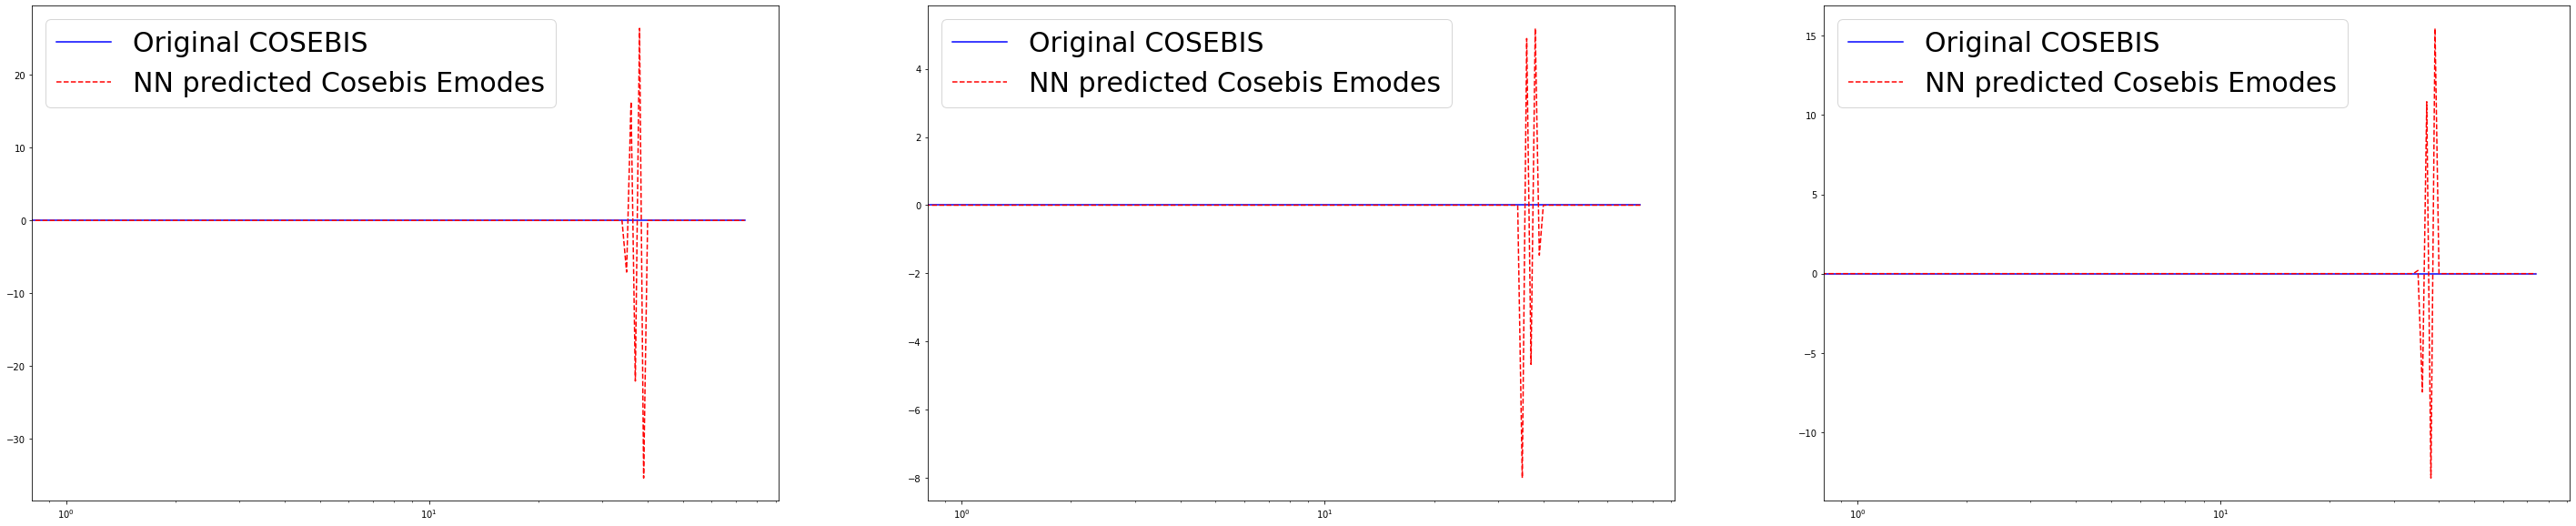

In [95]:
from matplotlib import gridspec
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(50,10))
for i in range(3):
    pred = predicted_COSEBIs_Emodes[i]
    true = testing_COSEBIs_E_modes[i] 
    ax[i].semilogx(true, 'blue', label = 'Original COSEBIS')
    ax[i].semilogx(pred, 'red', label = 'NN predicted Cosebis Emodes', linestyle='--')
#     ax[i].set_xlabel('$\ell$', fontsize='x-large')
#     ax[i].set_ylabel('$\\frac{\ell(\ell+1)}{2 \pi} C_\ell$', fontsize='x-large')
    ax[i].legend(fontsize=30) 
    
plt.savefig('examples_reconstruction_TT.pdf') 

In [81]:
print('emulator parameters: ', cp_nn.parameters)

emulator parameters:  ListWrapper(['omch2', 'ombh2', 'h0', 'n_s', 's8_input', 'halo_model', 'intrinsic_A'])


In [82]:
print('sampled multipoles: ', cp_nn.modes)
print('number of multipoles: ', cp_nn.n_modes)

sampled multipoles:  ListWrapper([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75])
number of multipoles:  75


### Accuracy
- This to carry how accurate `cosmopower_NN` predict to the test_data

In [85]:
from sklearn.metrics import mean_squared_error
accuracy = mean_squared_error(testing_COSEBIs_E_modes, predicted_COSEBIs_Emodes, squared=False,)
accuracy 

0.9823439841397451

In [ ]:
# !git clone https://github.com/simonsobs/so_noise_models

In [ ]:
# # load noise models from the SO noise repo
# noise_levels_load = np.loadtxt('/content/so_noise_models/LAT_comp_sep_noise/v3.1.0/SO_LAT_Nell_T_atmv1_goal_fsky0p4_ILC_CMB.txt')
# conv_factor = (2.7255e6)**2

In [ ]:
# ells = noise_levels_load[:, 0]
# SO_TT_noise = noise_levels_load[:, 1][:2509-40] / conv_factor
# new_ells = ells[:2509-40]

In [ ]:
# f_sky = 0.4
# prefac = np.sqrt(2/(f_sky*(2*new_ells+1)))
# denominator = prefac*(testing_spectra[:, 38:]+SO_TT_noise)  # use all of them
# diff = np.abs((predicted_testing_spectra[:, 38:] - testing_spectra[:, 38:])/(denominator))

# # Compute percentiles
# percentiles = np.zeros((4, diff.shape[1]))

# percentiles[0] = np.percentile(diff, 68, axis = 0)
# percentiles[1] = np.percentile(diff, 95, axis = 0)
# percentiles[2] = np.percentile(diff, 99, axis = 0)
# percentiles[3] = np.percentile(diff, 99.9, axis = 0)

In [ ]:
# plt.figure(figsize=(12, 9))
# plt.fill_between(new_ells, 0, percentiles[2,:], color = 'salmon', label = '99%', alpha=0.8)
# plt.fill_between(new_ells, 0, percentiles[1,:], color = 'red', label = '95%', alpha = 0.7)
# plt.fill_between(new_ells, 0, percentiles[0,:], color = 'darkred', label = '68%', alpha = 1)

# plt.ylim(0, 0.2)

# plt.legend(frameon=False, fontsize=30, loc='upper left')
# plt.ylabel(r'$\frac{| C_{\ell, \rm{emulated}}^{\rm{TT}} - C_{\ell, \rm{true}}^{\rm{TT}}|} {\sigma_{\ell, \rm{CMB}}^{\rm{TT}}}$', fontsize=50)
# plt.xlabel(r'$\ell$',  fontsize=50)

# ax = plt.gca()
# ax.xaxis.set_major_locator(plt.MaxNLocator(10))
# ax.yaxis.set_major_locator(plt.MaxNLocator(5))

# plt.setp(ax.get_xticklabels(), fontsize=25)
# plt.setp(ax.get_yticklabels(), fontsize=25)
# plt.tight_layout()
# plt.savefig('./accuracy_emu_TT_wide.pdf')